<a href="https://colab.research.google.com/github/Mark12481632/Imperial_MSc_Project/blob/main/code/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module 2 of the MSc Project.

My research project is intending to use a Graphical Neural Network (GNN) to predict the solubility, in water, of small organic molecules.
<BR><BR>

The ESOL dataset: https://moleculenet.org/datasets-1, has been identified as a suitable source of data for this project.  It consists of 1128 examples of small organic molecules records - if this is not enough data I may need to suplement this but can't know this until GNN training.  The information in this dataset will need to be transformed into a format suitable for a GNN - i.e. a graph.
<BR><BR>
The analysis and transformation of the "small organic molecule" dataset will need specific tools:

1.   **RDKIT (details:https://www.rdkit.org/docs/index.html)**<BR>
     The RDKit is an open-source cheminformatics toolkit written in C++ that is also useable from Java or Python. It includes a collection of standard cheminformatics functionality for molecule I/O, substructure searching, chemical reactions, coordinate generation (2D or 3D), fingerprinting
2.   **Pytorch-Geometric package (details: https://pytorch-geometric.readthedocs.io/en/latest/)**<BR>
     This is a library built upon PyTorch to easily write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data.

<BR>
This script and the dataset(s) used can be found in the following github repository: https://github.com/Mark12481632/Imperial_MSc_Project.git . Read the "README" file for guidance.
<BR>

**This script was run in Google's Colab environment.**
<BR><BR>

This script is comprised of the following sections: 
1.   Installation of the required packages.
2.   Loading and examining the "small organic molecule" dataset that.
3.   RDKIT usage
4.   Data validation checks on the "small organic molecule" dataset.
5.   Initial analysis of the "small organic molecule" dataset.
6.   Creation of the output dataset needed fro the GNN



**Section 1: Installation of the required packages.**

In [ ]:
%%capture

# Install CONDACOLAB
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
%%capture

# Install RDKIT
!conda install -c rdkit rdkit

In [ ]:
%%capture

# Install pytorch-geometric
!pip install torch_geometric

**Section 2: Loading the dataset**

In [ ]:
# Load the "ESOL" dataset

from torch_geometric.datasets import MoleculeNet

esol_data = MoleculeNet(name="ESOL", root=".")

Processing...
Done!


**Section 3: Using RDKIT**


1.   Use RDKIT to display molecules in 2D structure
2.   Use RDKIT to search for similar molecule structures.



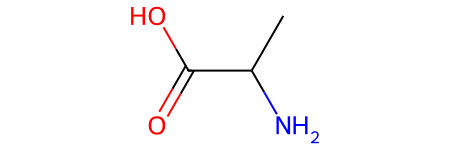

In [ ]:
# 1. Display molecule in 2D structure

from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d


def draw2D(m):
  """
  Present the molecule in 2D structure
  """
  molSize=(450,150)                 # Draw size
  mc = Chem.Mol(m.ToBinary())
  if not mc.GetNumConformers():
    rdd.Compute2DCoords(mc)
  drawer = draw2d.MolDraw2DSVG(molSize[0], molSize[1])
  drawer.DrawMolecule(mc)
  drawer.FinishDrawing()
  svg = drawer.GetDrawingText()
  display(SVG(svg.replace('svg:', '')))

# load a SMILES molecule
mol = Chem.MolFromSmiles('CC(N)C(=O)O')

# Display molecule
draw2D(mol)

In [ ]:
esol_data

ESOL(1128)